following tutorial from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
import pandas as pd
df = pd.read_csv('2020-10-17.csv')
print(len(df))
print('\n'.join(df['text'][:10].values.tolist()))

121705
RT @jdmaccoby: Trump showed he can lose a debate all by himself
RT @DonaldJTrumpJr: Media will run cover for them but this is a very important point!
@56blackcat Biden couldn't get any sleazier. His record on racist policies and racist rants on the senate floor are disgusting.
RT @brettturner57: Trump went by my office today. My salute to the commander in cheat! https://t.co/5xXEK51oWJ
RT @RandyWr16505387: And look who they are all after * Donald Trump * . He's destroying their playhouse. https://t.co/LD8RBQjE6p
RT @KellyAngard: We need to hear more from John Kelly
TD Borah 

Capital 7
Borah 12

0:20 3rd Quarter

@CapitalBSD @CapitalEagleAt1 @idahosports @KTVBhss @michaellycklama
RT @funder: Network YouTube views as of 9pm

Biden: 507,445 ABC
Trump: 153,660 NBC
RT @BeingLiberal: Retweet if you #BlameTrump for the worst pandemic response on the face of the earth.
RT @jdmaccoby: Trump showed he can lose a debate all by himself


In [2]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['rt', 'https', 'http', 'from', 'subject', 're', 'edu', 'use'])

In [3]:
import re
from pprint import pprint
data = df['text'].values.tolist()
# Remove any urls
data = [re.sub(r'http\S+', '', sent) for sent in data]
# Remove words with less than 3 chars
data = [re.sub(r'\b\w{1,2}\b', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
pprint(data[:10])

[' @jdmaccoby: Trump showed can lose debate all himself',
 ' @DonaldJTrumpJr: Media will run cover for them but this very important '
 'point!',
 "@56blackcat Biden couldn' get any sleazier. His record racist policies and "
 'racist rants the senate floor are disgusting.',
 ' @brettturner57: Trump went office today. salute the commander cheat! ',
 " @RandyWr16505387: And look who they are all after * Donald Trump * . ' "
 'destroying their playhouse. ',
 ' @KellyAngard: need hear more from John Kelly',
 ' Borah Capital Borah : 3rd Quarter @CapitalBSD @CapitalEagleAt1 @idahosports '
 '@KTVBhss @michaellycklama',
 ' @funder: Network YouTube views 9pm Biden: 507,445 ABC Trump: 153,660 NBC',
 ' @BeingLiberal: Retweet you #BlameTrump for the worst pandemic response the '
 'face the earth.',
 ' @jdmaccoby: Trump showed can lose debate all himself']


In [4]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:10])

[['jdmaccoby', 'trump', 'showed', 'can', 'lose', 'debate', 'all', 'himself'], ['donaldjtrumpjr', 'media', 'will', 'run', 'cover', 'for', 'them', 'but', 'this', 'very', 'important', 'point'], ['blackcat', 'biden', 'couldn', 'get', 'any', 'sleazier', 'his', 'record', 'racist', 'policies', 'and', 'racist', 'rants', 'the', 'senate', 'floor', 'are', 'disgusting'], ['brettturner', 'trump', 'went', 'office', 'today', 'salute', 'the', 'commander', 'cheat'], ['randywr', 'and', 'look', 'who', 'they', 'are', 'all', 'after', 'donald', 'trump', 'destroying', 'their', 'playhouse'], ['kellyangard', 'need', 'hear', 'more', 'from', 'john', 'kelly'], ['borah', 'capital', 'borah', 'rd', 'quarter', 'capitalbsd', 'capitaleagleat', 'idahosports', 'ktvbhss', 'michaellycklama'], ['funder', 'network', 'youtube', 'views', 'pm', 'biden', 'abc', 'trump', 'nbc'], ['beingliberal', 'retweet', 'you', 'blametrump', 'for', 'the', 'worst', 'pandemic', 'response', 'the', 'face', 'the', 'earth'], ['jdmaccoby', 'trump', 's

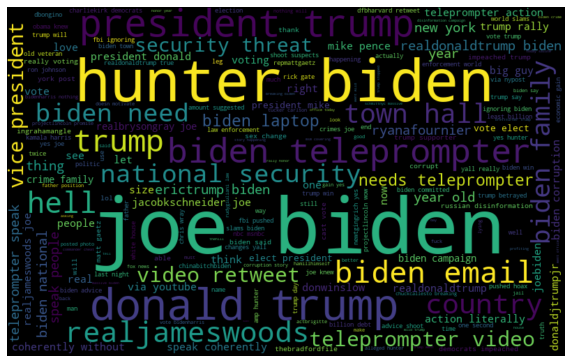

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join([item for sublist in data_words for item in sublist]))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [5]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(bigram_mod[data_words[0]])
# print(trigram_mod[bigram_mod[data_words[0]]])

In [6]:
from gensim.utils import simple_preprocess
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
print('nostops', data_words_nostops[:10])
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
print('bigrams', data_words_bigrams[:10])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print('lemmatized', data_lemmatized[:10])

nostops [['jdmaccoby', 'trump', 'showed', 'lose', 'debate'], ['donaldjtrumpjr', 'media', 'run', 'cover', 'important', 'point'], ['blackcat', 'biden', 'get', 'sleazier', 'record', 'racist', 'policies', 'racist', 'rants', 'senate', 'floor', 'disgusting'], ['brettturner', 'trump', 'went', 'office', 'today', 'salute', 'commander', 'cheat'], ['randywr', 'look', 'donald', 'trump', 'destroying', 'playhouse'], ['kellyangard', 'need', 'hear', 'john', 'kelly'], ['borah', 'capital', 'borah', 'rd', 'quarter', 'capitalbsd', 'capitaleagleat', 'idahosports', 'ktvbhss', 'michaellycklama'], ['funder', 'network', 'youtube', 'views', 'pm', 'biden', 'abc', 'trump', 'nbc'], ['beingliberal', 'retweet', 'blametrump', 'worst', 'pandemic', 'response', 'face', 'earth'], ['jdmaccoby', 'trump', 'showed', 'lose', 'debate']]
bigrams [['jdmaccoby', 'trump', 'showed', 'lose_debate'], ['donaldjtrumpjr', 'media', 'run_cover', 'important_point'], ['blackcat', 'biden', 'get', 'sleazier', 'record', 'racist', 'policies', '

In [9]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized_words = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print('lemmatized', data_lemmatized_words[:10])

lemmatized [['show', 'can', 'lose', 'debate'], ['will', 'run', 'cover', 'very', 'important', 'point'], ['get', 'sleazy', 'record', 'racist', 'policy', 'racist', 'rant', 'floor', 'disgusting'], ['go', 'office', 'today', 'salute', 'commander', 'cheat'], ['look', 'all', 'destroy', 'playhouse'], ['need', 'hear', 'more'], ['quarter', 'capitalbsd', 'capitaleagleat', 'idahosport'], ['network'], ['blametrump', 'bad', 'pandemic', 'response', 'face', 'earth'], ['show', 'can', 'lose', 'debate']]


In [11]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized_words)
# Create Corpus
texts = data_lemmatized_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:10])
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:10]])

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1)], [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(24, 1), (25, 1), (26, 1), (27, 1)], [(28, 1), (29, 1), (30, 1)], [(31, 1), (32, 1), (33, 1), (34, 1)], [(35, 1)], [(36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1)], [(0, 1), (1, 1), (2, 1), (3, 1)]]
[[('can', 1), ('debate', 1), ('lose', 1), ('show', 1)], [('cover', 1), ('important', 1), ('point', 1), ('run', 1), ('very', 1), ('will', 1)], [('disgusting', 1), ('floor', 1), ('get', 1), ('policy', 1), ('racist', 2), ('rant', 1), ('record', 1), ('sleazy', 1)], [('cheat', 1), ('commander', 1), ('go', 1), ('office', 1), ('salute', 1), ('today', 1)], [('all', 1), ('destroy', 1), ('look', 1), ('playhouse', 1)], [('hear', 1), ('more', 1), ('need', 1)], [('capitalbsd', 1), ('capitaleagleat', 1), ('idahosport', 1), ('quarter', 1)], [('network', 1)], [('bad', 1), ('blametrump', 1

In [12]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
# doc_lda

[(0,
  '0.124*"trump" + 0.043*"realdonaldtrump" + 0.043*"vote" + 0.031*"just" + '
  '0.018*"say" + 0.017*"too" + 0.017*"rally" + 0.016*"day" + 0.016*"want" + '
  '0.015*"country"'),
 (1,
  '0.122*"biden" + 0.029*"chinese" + 0.028*"link" + 0.028*"firm" + '
  '0.028*"investment" + 0.027*"corporation" + 0.027*"breitbartnew" + '
  '0.024*"live" + 0.024*"will" + 0.018*"win"'),
 (2,
  '0.026*"major" + 0.026*"lie" + 0.025*"story" + 0.019*"good" + 0.018*"think" '
  '+ 0.018*"blast" + 0.017*"threat" + 0.017*"union" + 0.016*"where" + '
  '0.016*"how"'),
 (3,
  '0.052*"make" + 0.037*"here" + 0.036*"realjameswood" + 0.035*"get" + '
  '0.026*"hell" + 0.024*"retweet" + 0.021*"security" + 0.021*"now" + '
  '0.021*"more" + 0.020*"year"')]


In [ ]:
lda_model.show_topics()

In [16]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\nPer topic coherence score: ', coherence_model_lda.get_coherence_per_topic())


Perplexity:  -7.607263541324804

Coherence Score:  0.35677334259856686

Per topic coherence score:  [0.24845161282058692, 0.28389708586731605, 0.49031367190452935, 0.40443099980183506]


In [14]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
# import matplotlib.pyplot as plt
# %matplotlib inline
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.283508 -0.249571       1        1  30.743015
2     -0.086103  0.229855       2        1  25.442633
1     -0.322542 -0.196747       3        1  23.249971
3      0.125137  0.216462       4        1  20.564383, topic_info=                 Term          Freq         Total Category  logprob  loglift
52              trump  20861.000000  20861.000000  Default  30.0000  30.0000
53              biden  15456.000000  15456.000000  Default  29.0000  29.0000
127              make   5838.000000   5838.000000  Default  28.0000  28.0000
345   realdonaldtrump   7290.000000   7290.000000  Default  27.0000  27.0000
93               vote   7209.000000   7209.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
1973            large    828.769531    829.937012   Topic4  -4.9080   1.5802
2486            bitch    739.547729    740.464783   Topic4  -5.0219   1.5804
252              year   2271.808350   3853.644775   Topic4  -3.8996   1.0532
131             video   1447.438477   3391.717285   Topic4  -4.3503   0.7301
228              stop    794.331238    934.544189   Topic4  -4.9504   1.4191

[166 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
894       1  0.999596  again
325       1  0.999364    ask
1514      4  0.999668    ass
36        1  0.999005    bad
53        3  0.999970  biden
...     ...       ...    ...
132       3  0.999597    win
417       1  0.999216   work
335       1  0.999626  would
252       1  0.410261   year
252       4  0.589572   year

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

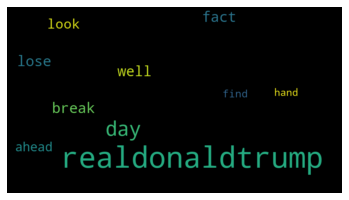

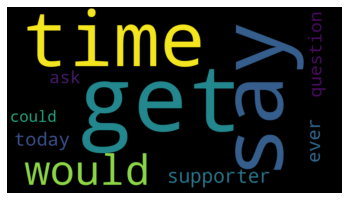

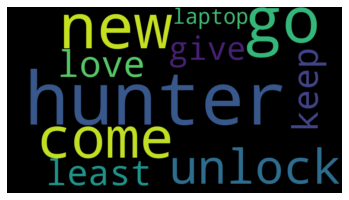

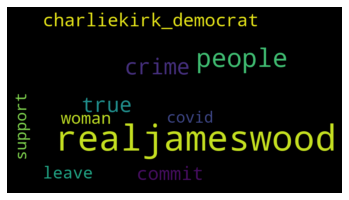

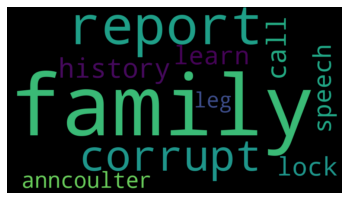

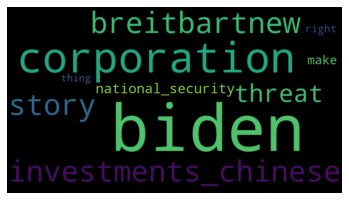

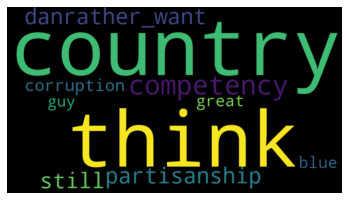

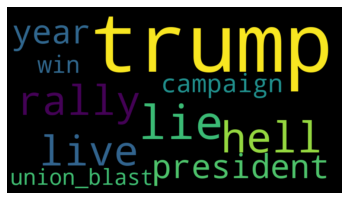

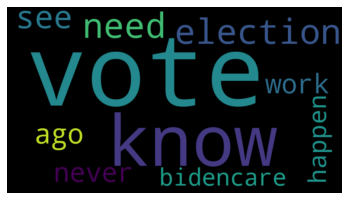

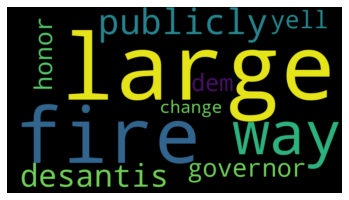

In [50]:
t = lda_model.show_topics(formatted=False)
for x in t:
    word_freq = dict(x[1])
    wordcloud = WordCloud(width=900,height=500, max_words=1628,normalize_plurals=False).generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [21]:
from lexicon.py import l
l

SyntaxError: invalid syntax (lexicon.py, line 3)

In [59]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
#         print(row[0])
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

KeyboardInterrupt: 

In [46]:
import os
os.environ['MALLET_HOME'] = 'D:\\Development\\IS4152-twitter\\mallet-2.0.8'
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'D:\\Development\\IS4152-twitter\\mallet-2.0.8\\bin\\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)
ldamallet[corpus]

[[(0, 0.09803921568627452),
  (1, 0.09803921568627452),
  (2, 0.09803921568627452),
  (3, 0.09803921568627452),
  (4, 0.09803921568627452),
  (5, 0.11764705882352942),
  (6, 0.09803921568627452),
  (7, 0.09803921568627452),
  (8, 0.09803921568627452),
  (9, 0.09803921568627452)],
 [(0, 0.10000000000000002),
  (1, 0.10000000000000002),
  (2, 0.10000000000000002),
  (3, 0.10000000000000002),
  (4, 0.10000000000000002),
  (5, 0.10000000000000002),
  (6, 0.10000000000000002),
  (7, 0.10000000000000002),
  (8, 0.10000000000000002),
  (9, 0.10000000000000002)],
 [(0, 0.10169491525423731),
  (1, 0.09792843691148777),
  (2, 0.08474576271186442),
  (3, 0.08851224105461394),
  (4, 0.08474576271186442),
  (5, 0.11864406779661019),
  (6, 0.08474576271186442),
  (7, 0.11676082862523542),
  (8, 0.10169491525423731),
  (9, 0.12052730696798494)],
 [(0, 0.09803921568627451),
  (1, 0.09803921568627451),
  (2, 0.09803921568627451),
  (3, 0.09803921568627451),
  (4, 0.09803921568627451),
  (5, 0.098039215

In [43]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('biden', 0.1352557384807816),
   ('realdonaldtrump', 0.12318718096075183),
   ('day', 0.053243636117778305),
   ('break', 0.04817281363037085),
   ('threat', 0.04431898853994118),
   ('national_security', 0.04100605118150164),
   ('report', 0.033568844866637366),
   ('true', 0.03113485007268179),
   ('run', 0.026131638551773098),
   ('allege', 0.014739190696731009)]),
 (1,
  [('realjameswood', 0.10213303209515583),
   ('people', 0.09681706425676125),
   ('thing', 0.05056814406272842),
   ('teleprompter', 0.04707954016878198),
   ('hell', 0.04448800584756462),
   ('speak', 0.044155757857664964),
   ('watch', 0.03355704697986577),
   ('man', 0.028739451126320686),
   ('size', 0.02342348328792611),
   ('talk', 0.019071034620240547)]),
 (2,
  [('trump', 0.058220321998797515),
   ('make', 0.044324938205624956),
   ('voting', 0.03784487941746276),
   ('video', 0.029661300020041418),
   ('show', 0.026922306099271827),
   ('great', 0.02421671454338967),
   ('word', 0.02268020575856770

In [104]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, alpha=0.001, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [105]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=16, step=2)

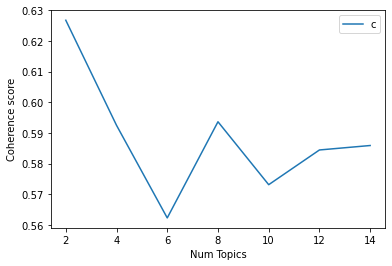

In [107]:
import matplotlib.pyplot as plt
# %matplotlib inline
# Show graph
limit=16; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [108]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6268
Num Topics = 4  has Coherence Value of 0.5925
Num Topics = 6  has Coherence Value of 0.5623
Num Topics = 8  has Coherence Value of 0.5936
Num Topics = 10  has Coherence Value of 0.5731
Num Topics = 12  has Coherence Value of 0.5844
Num Topics = 14  has Coherence Value of 0.5859


In [109]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.072*"trump" + 0.025*"biden" + 0.021*"vote" + 0.016*"rally" + 0.015*"year" '
  '+ 0.011*"stop" + 0.010*"honor" + 0.010*"real" + 0.009*"call" + '
  '0.008*"hunter"'),
 (1,
  '0.079*"trump" + 0.038*"biden" + 0.016*"break" + 0.014*"vote" + '
  '0.013*"family" + 0.008*"people" + 0.008*"campaign" + '
  '0.007*"realdonaldtrump" + 0.007*"hunter" + 0.006*"today"'),
 (2,
  '0.057*"trump" + 0.032*"vote" + 0.027*"biden" + 0.011*"word" + '
  '0.010*"hunter" + 0.010*"family" + 0.009*"realjameswoods_oop" + 0.009*"make" '
  '+ 0.009*"bad" + 0.008*"real"'),
 (3,
  '0.065*"trump" + 0.031*"biden" + 0.013*"break" + 0.011*"rally" + '
  '0.011*"watch" + 0.010*"real" + 0.010*"people" + 0.009*"win" + 0.009*"stop" '
  '+ 0.009*"laptop"'),
 (4,
  '0.065*"trump" + 0.021*"awful" + 0.021*"biden" + 0.014*"vote" + 0.013*"real" '
  '+ 0.013*"check" + 0.011*"date" + 0.011*"confirm" + 0.009*"laptop" + '
  '0.009*"people"'),
 (5,
  '0.080*"trump" + 0.028*"biden" + 0.019*"break" + 0.018*"vote" + '
  '0.016*"ral

In [94]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.1087,"campaign, show, love, awful, fire, happen, giv...",@jdmaccoby: Trump showed he can lose a debate ...
1,1,0.0,0.0909,"trump, year, rally, stop, honor, buy, live, gr...",@DonaldJTrumpJr: Media will run cover for them...
2,2,10.0,0.1392,"action, speak_coherently, president, debate, w...",@56blackcat Biden couldn't get any sleazier. H...
3,3,9.0,0.1066,"realdonaldtrump, bad, time, rating, scream, mo...",@brettturner57: Trump went by my office today....
4,4,4.0,0.1087,"trump, win, country, word, day, leave, mrmicha...",@RandyWr16505387: And look who they are all af...
5,5,2.0,0.1087,"break, real, hunter, laptop, jail, hear, legit...",@KellyAngard: We need to hear more from John K...
6,6,4.0,0.1418,"trump, win, country, word, day, leave, mrmicha...",TD Borah Capital 7 Borah 12 0:20 3rd Quarter @...
7,7,9.0,0.1087,"realdonaldtrump, bad, time, rating, scream, mo...",@funder: Network YouTube views as of 9pm Biden...
8,8,5.0,0.1695,"campaign, show, love, awful, fire, happen, giv...",@BeingLiberal: Retweet if you #BlameTrump for ...
9,9,5.0,0.1087,"campaign, show, love, awful, fire, happen, giv...",@jdmaccoby: Trump showed he can lose a debate ...


In [88]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2265,"trump, family, run, debate, lose, lie, blametr...","@JoeBiden Lie, lies and more lies. Question: h..."
1,1.0,0.2542,"trump, people, watch, call, good, friend, pres...",@dorismo27665495: The MeidasTouch brothers are...
2,2.0,0.2399,"trump, vote, win, country, day, election, send...",@romyreiner: Ignore polls. Vote like trump is ...
3,3.0,0.2266,"biden, break, trump, bad, crime, scream, lunat...",@Breaking911: BREAKING: The US Supreme Court w...
4,4.0,0.2325,"make, time, check, buy, live, happen, great, b...",@LouDobbs: Source on alleged Hunter Biden emai...


In [89]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,7.0,"email, confirm, show, thebradfordfile, love, c...",6832.0,0.3113
1.0,0.0,"trump, family, run, debate, lose, lie, blametr...",2345.0,0.1069
2.0,6.0,"action, realdonaldtrump, biden, speak_coherent...",2167.0,0.0987
3.0,5.0,"year, rally, real, hunter, stop, laptop, trump...",1945.0,0.0886
4.0,0.0,"trump, family, run, debate, lose, lie, blametr...",2375.0,0.1082
...,...,...,...,...
21941.0,2.0,"trump, vote, win, country, day, election, send...",NaN,NaN
21942.0,1.0,"trump, people, watch, call, good, friend, pres...",NaN,NaN
21943.0,0.0,"trump, family, run, debate, lose, lie, blametr...",NaN,NaN
21944.0,3.0,"biden, break, trump, bad, crime, scream, lunat...",NaN,NaN


In [95]:
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

AttributeError: 'LdaMallet' object has no attribute 'inference'